# Supervised Learning with Exploratory Data Analysis - Week 7 Core Independent Project

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [3]:
#Importing Libraries 
#

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the Dataset
# Dataset url = 
#


# Load the dataset
house = pd.read_csv('Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house.shape 

(21613, 20)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
# Previewing the top of our dataset
#
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
house.head

<bound method NDFrame.head of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 colu

In [10]:
# Previewing the bottom of our dataset
# 
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
# Checking whether each column has an appropriate datatype
#
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [12]:
house.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
house.duplicated().sum()

3

In [14]:
house.drop_duplicates(inplace=True) 

In [15]:
# Dropping irrelevant columns
house.drop(columns=['id', 'lat', 'long', 'waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)

In [16]:
# Checking for Anomalies
#

#Checking for annomalies
# Checking for Outliers
#

Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323387.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1124.50
sqft_lot           5648.75
floors                1.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
yr_built             46.00
zipcode              85.00
sqft_living15       870.00
sqft_lot15         4983.00
dtype: float64


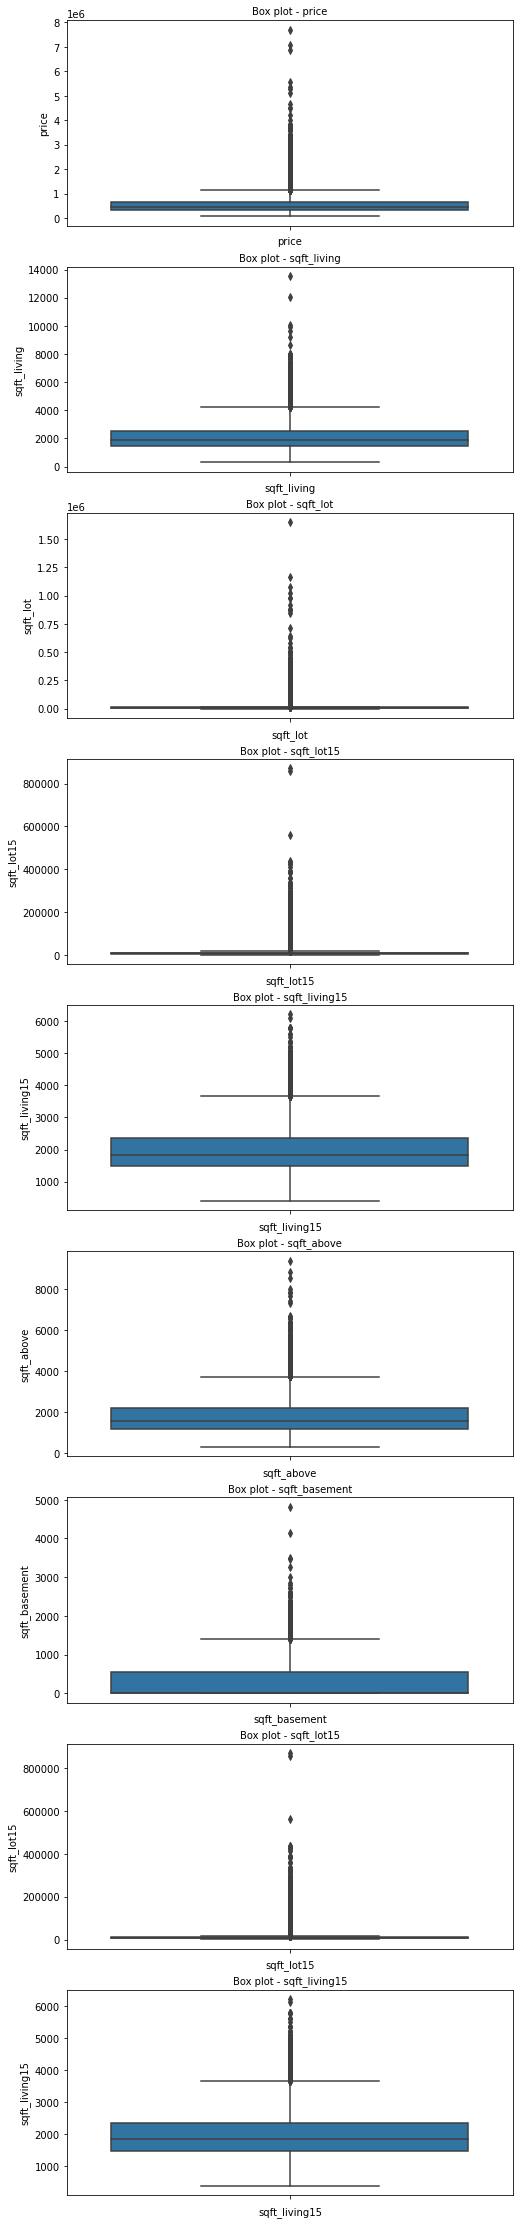

In [17]:
#Plotting the box plot for columns with outliers

col_names = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=house[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [18]:
# Removing outliers
house = house[~((house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))).any(axis=1)]
house.shape

(16612, 14)

In [19]:
# Dealing with the Missing Data
#

In [20]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

In [21]:
# Ploting the univariate summaries and recording our observations
#
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.661200e+04,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000
mean,4.524053e+05,3.269083,1.984574,1838.827354,7054.684987,1.466079,3.417108,7.401637,1590.670178,248.157176,1969.976764,98081.933843,1815.761558,6932.756381
std,1.895564e+05,0.775242,0.649025,623.932141,3384.975688,0.544185,0.644826,0.811774,599.165058,366.895185,29.705813,54.046737,514.988225,3015.852296
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,620.000000,651.000000
25%,3.055000e+05,3.000000,1.500000,1360.000000,4750.000000,1.000000,3.000000,7.000000,1150.000000,0.000000,1950.000000,98033.000000,1440.000000,4820.000000
50%,4.190000e+05,3.000000,2.000000,1770.000000,7029.500000,1.000000,3.000000,7.000000,1440.000000,0.000000,1971.000000,98074.000000,1720.000000,7169.000000
75%,5.641125e+05,4.000000,2.500000,2240.000000,9000.000000,2.000000,4.000000,8.000000,1920.000000,500.000000,1997.000000,98119.000000,2130.000000,8744.000000
max,1.130000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,5.000000,9.000000,3740.000000,1400.000000,2015.000000,98199.000000,3640.000000,17550.000000


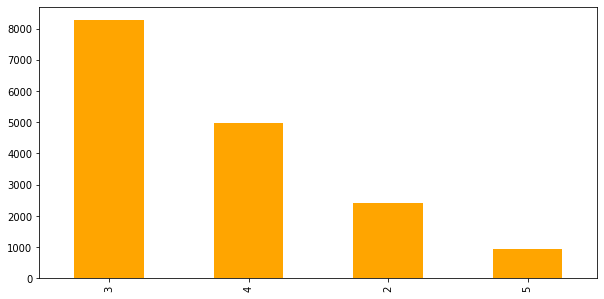

In [22]:
# Ploting the univariate summaries and recording our observations
#

import warnings
warnings.filterwarnings('ignore')

# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (10,5))
house['bedrooms'].value_counts().plot(kind = 'bar', color = 'orange')

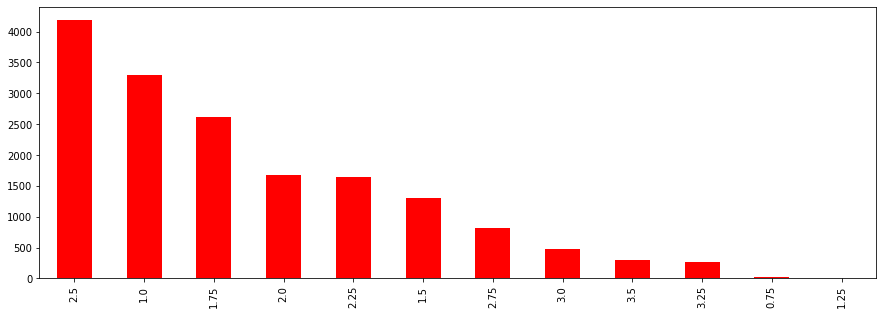

In [23]:
plt.figure(figsize = (15,5))
house['bathrooms'].value_counts().plot(kind = 'bar', color = 'red')

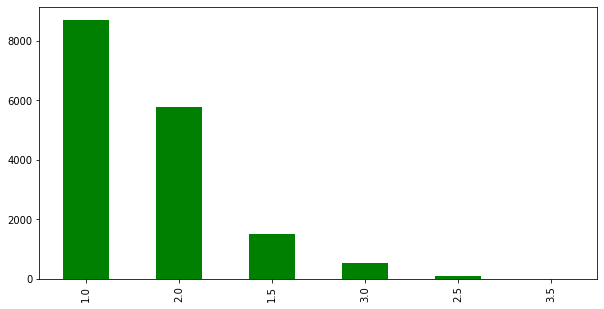

In [24]:
plt.figure(figsize = (10,5))
house['floors'].value_counts().plot(kind = 'bar', color = 'green')

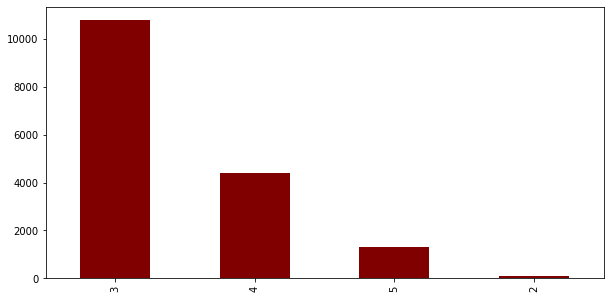

In [25]:
plt.figure(figsize = (10,5))
house['condition'].value_counts().plot(kind = 'bar', color = 'maroon')

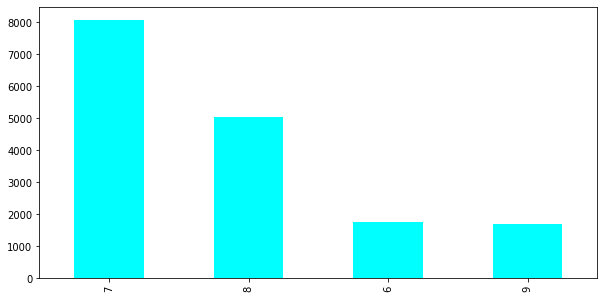

In [26]:
plt.figure(figsize = (10,5))
house['grade'].value_counts().plot(kind = 'bar', color = 'cyan')

Observations
Most of the houses owned by the Hass Consultig company are three bedroomed.
Most of the houses owned by the company have 2.5 bathrooms.
Most of the houses have one floor.
Most of their houses are grade 7.
##Checking for data distribution

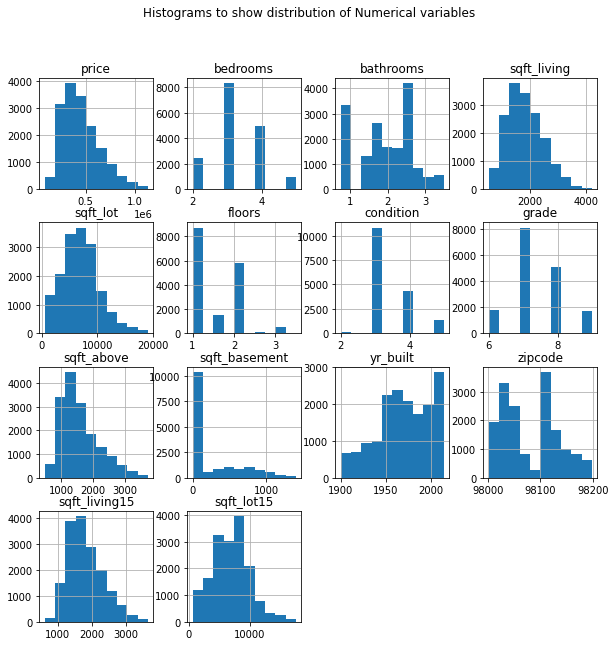

In [27]:
##Checking for data distribution
house.hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

**b) Bivariate Analysis**

In [28]:
#Exporting the clean dataset:
#Correlation matrix.

matrix = house.corr()
matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.240482,0.351898,0.525741,-0.076376,0.219632,0.080447,0.535590,0.399446,0.241738,-0.056643,0.031208,0.459757,-0.084993
bedrooms,0.240482,1.000000,0.451397,0.608794,0.197087,0.131016,0.023426,0.293360,0.477339,0.255771,0.151101,-0.170408,0.399656,0.185039
bathrooms,0.351898,0.451397,1.000000,0.673522,-0.071624,0.513234,-0.148754,0.580506,0.590502,0.181044,0.556519,-0.220397,0.499009,-0.076634
sqft_living,0.525741,0.608794,0.673522,1.000000,0.170916,0.313246,-0.062333,0.624929,0.820780,0.360183,0.314758,-0.196734,0.710310,0.153119
sqft_lot,-0.076376,0.197087,-0.071624,0.170916,1.000000,-0.398300,0.137912,-0.019901,0.122005,0.091413,-0.076768,-0.246742,0.211233,0.877589
floors,0.219632,0.131016,0.513234,0.313246,-0.398300,1.000000,-0.286326,0.459502,0.523008,-0.321410,0.513873,-0.059118,0.233917,-0.404227
condition,0.080447,0.023426,-0.148754,-0.062333,0.137912,-0.286326,1.000000,-0.179981,-0.182266,0.191651,-0.377120,0.002678,-0.112499,0.140645
grade,0.535590,0.293360,0.580506,0.624929,-0.019901,0.459502,-0.179981,1.000000,0.630046,0.033829,0.470836,-0.183223,0.598915,-0.011633
sqft_above,0.399446,0.477339,0.590502,0.820780,0.122005,0.523008,-0.182266,0.630046,1.000000,-0.237272,0.449356,-0.283333,0.679684,0.106205
sqft_basement,0.241738,0.255771,0.181044,0.360183,0.091413,-0.321410,0.191651,0.033829,-0.237272,1.000000,-0.198561,0.128141,0.097965,0.086950


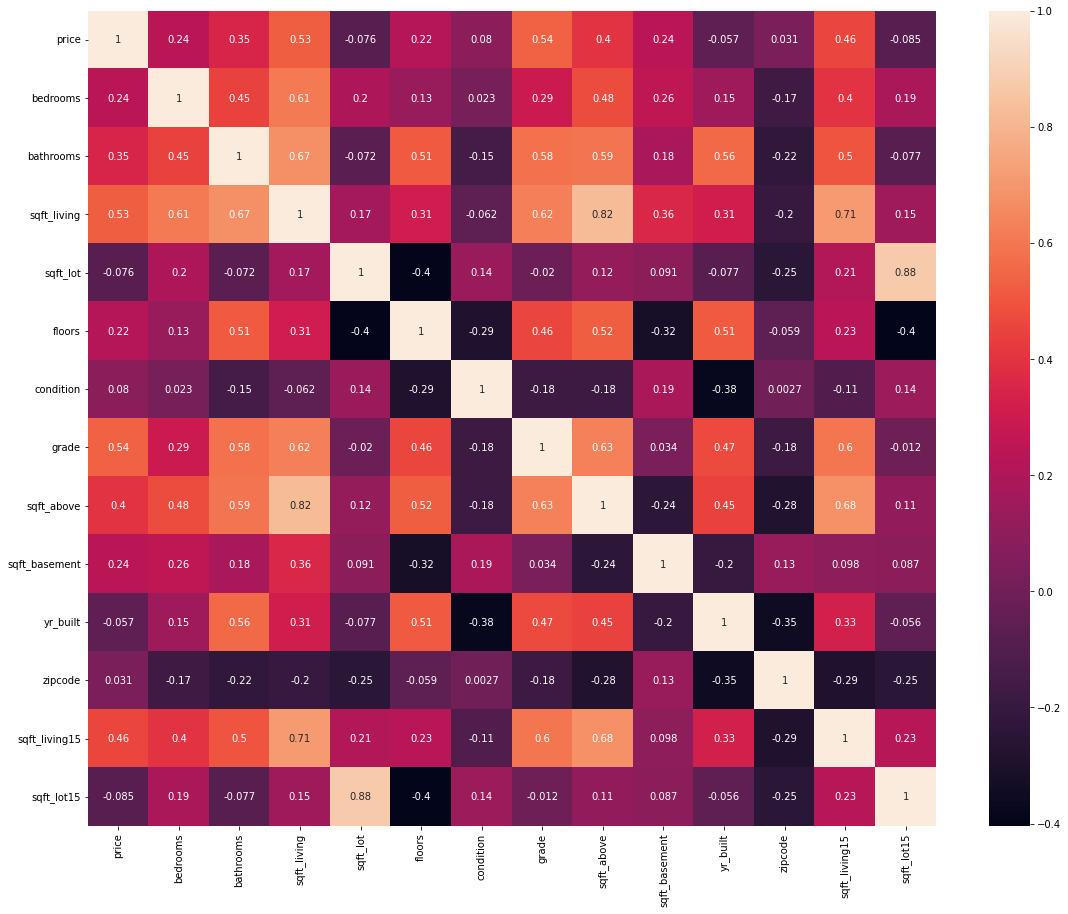

In [29]:
#Plottting a heatmap to show correlation of different numerical variables
f = plt.figure(figsize=(19, 15))
sns.heatmap(house.corr(), xticklabels = house.corr().columns, yticklabels = house.corr().columns, annot=True)

## 7. Implementing the Solution

**Model 1: Detecting multicollinearity**

In [30]:
# Implementing the Solution
import numpy as np
import pandas as pd


In [31]:
# Checking for multicollinearity on the independent variables only

F = house.drop('price', 1)
correlations = F.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.451397,0.608794,0.197087,0.131016,0.023426,0.293360,0.477339,0.255771,0.151101,-0.170408,0.399656,0.185039
bathrooms,0.451397,1.000000,0.673522,-0.071624,0.513234,-0.148754,0.580506,0.590502,0.181044,0.556519,-0.220397,0.499009,-0.076634
sqft_living,0.608794,0.673522,1.000000,0.170916,0.313246,-0.062333,0.624929,0.820780,0.360183,0.314758,-0.196734,0.710310,0.153119
sqft_lot,0.197087,-0.071624,0.170916,1.000000,-0.398300,0.137912,-0.019901,0.122005,0.091413,-0.076768,-0.246742,0.211233,0.877589
floors,0.131016,0.513234,0.313246,-0.398300,1.000000,-0.286326,0.459502,0.523008,-0.321410,0.513873,-0.059118,0.233917,-0.404227
condition,0.023426,-0.148754,-0.062333,0.137912,-0.286326,1.000000,-0.179981,-0.182266,0.191651,-0.377120,0.002678,-0.112499,0.140645
grade,0.293360,0.580506,0.624929,-0.019901,0.459502,-0.179981,1.000000,0.630046,0.033829,0.470836,-0.183223,0.598915,-0.011633
sqft_above,0.477339,0.590502,0.820780,0.122005,0.523008,-0.182266,0.630046,1.000000,-0.237272,0.449356,-0.283333,0.679684,0.106205
sqft_basement,0.255771,0.181044,0.360183,0.091413,-0.321410,0.191651,0.033829,-0.237272,1.000000,-0.198561,0.128141,0.097965,0.086950
yr_built,0.151101,0.556519,0.314758,-0.076768,0.513873,-0.377120,0.470836,0.449356,-0.198561,1.000000,-0.351713,0.329910,-0.055767


*Computing the Variance Inflation Factor(VIF)*


We create a new dataframe with the INVERSE of the correlations above.

In [32]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.687836,-0.322455,-1.450100e+00,-0.067188,0.013406,-0.034370,0.217844,4.240878e-01,2.775125e-01,0.109964,0.078029,0.094230,-0.107062
bathrooms,-0.322455,2.861101,-5.154125e-01,0.053501,-0.692755,-0.131244,-0.227338,-3.555608e-01,-7.221225e-01,-0.883535,0.103587,-0.055131,0.137129
sqft_living,-1.461384,-0.526193,6.673875e+13,-0.689970,1.222876,-0.612500,-1.483480,-6.408955e+13,-3.924486e+13,0.111697,-0.208882,-1.155842,1.070091
sqft_lot,-0.067188,0.053501,-6.891415e-01,4.555009,0.440017,0.020231,0.090251,9.619147e-02,3.048362e-01,0.109546,0.175950,0.148985,-3.720152
floors,0.013406,-0.692755,1.233618e+00,0.440017,2.650666,0.077957,-0.316545,-1.947932e+00,-1.056594e-01,-0.419044,-0.187321,0.254424,0.514677
condition,-0.034370,-0.131244,-6.121274e-01,0.020231,0.077957,1.237384,-0.001715,6.063203e-01,2.597977e-01,0.496791,0.165728,0.102844,-0.112170
grade,0.217844,-0.227338,-1.480946e+00,0.090251,-0.316545,-0.001715,2.205778,6.658126e-01,4.929103e-01,-0.341202,-0.066191,-0.588175,-0.025836
sqft_above,0.427399,-0.349880,-6.408955e+13,0.094496,-1.943734,0.607553,0.666721,6.154550e+13,3.768703e+13,0.142367,0.200151,-0.371101,-0.943836
sqft_basement,0.276037,-0.718939,-3.924486e+13,0.304621,-0.101044,0.260523,0.494276,3.768703e+13,2.307743e+13,0.282810,-0.122732,0.149691,-0.498568
yr_built,0.109964,-0.883535,1.112993e-01,0.109546,-0.419044,0.496791,-0.341202,1.427490e-01,2.830438e-01,2.158491,0.490466,0.012752,-0.244983


From this we observe that sqft_living, sqft_above have a VIF factor above 5. So, I'll remove the sqft_living and sqft_above features and see how they affect our accuracy, compared to accuracy when we leave them in.

Model 1: Building the Model

In [42]:

# This is the version that excludes the 2 variables
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split



# Subsetting the data

X = house[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house['price']

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
from sklearn.metrics import r2_score
from sklearn import metrics

y_pred = regressor.predict(X_test)

print("For the model excluding both sqft_living and sqft_above:")
print("         The R2 score is:", r2_score(y_test, y_pred))
print('         Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding both sqft_living and sqft_above:
         The R2 score is: 0.515110991565663
         Root Mean Squared Error: 132393.44764778888


In [49]:
# This is the version that includes sqft_above ONLY

# Subsetting the data
X = house[['bedrooms', 'bathrooms', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house['price']

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_living only:")
print("        The R2 score is:", r2_score(y_test, y_pred))
print('        Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_living only:
        The R2 score is: 0.5241707950185682
        Root Mean Squared Error: 131150.77735592556


In [43]:
# This is the version that includes sqft_living ONLY
from sklearn.linear_model import LinearRegression

# Subsetting the data
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house['price']


# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_above only:")
print("          The R2 score is:", r2_score(y_test, y_pred))
print('          Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_above only:
          The R2 score is: 0.5241707950185677
          Root Mean Squared Error: 131150.77735592565


In [44]:
# This is the version that includes both sqft_above and sqft_living 

# Subsetting the data
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = house['price']



# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_all, y_train_all)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred_all = regressor.predict(X_test_all)

print("For the model including both sqft_living and sqft_above:")
print("           The R2 score is:", r2_score(y_test, y_pred))
print('           Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model including both sqft_living and sqft_above:
           The R2 score is: 0.5241707950185677
           Root Mean Squared Error: 131150.77735592565


**Model 1:Residual Plots and Heteroscedasticity Testl**

In [51]:

# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

# Splitting our data into training and test sets

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [52]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
# This is our prediction for price based on our model
y_predict = a = regressor.predict(X_test)

# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_predict, y_test)


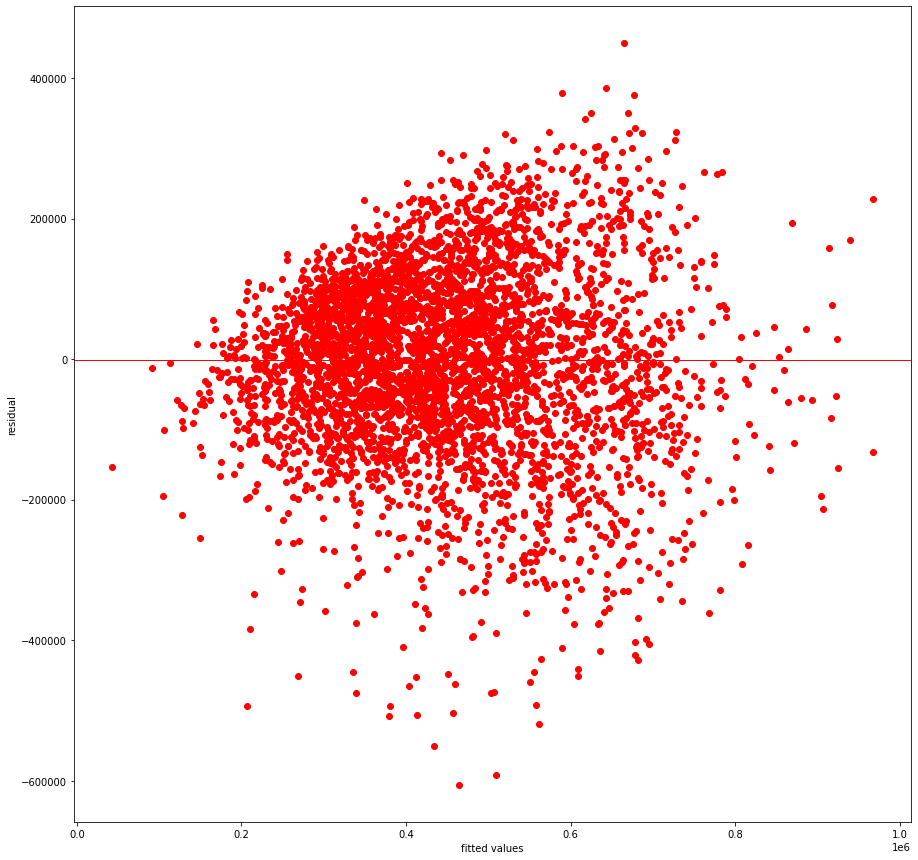

In [56]:
## Building the residual plot

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
plt.scatter(y_predict, residuals, color='Red')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

As you can see, the  residuals are randomly scattered around zero for the entire range of fitted values.This tells   that the model’s predictions are correct on average.

**Model 1: Barlett's Test of Heteroscedasticity**

In [57]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("The critical value is:", critical_value)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The critical value is: 4434.1150227222215
The variances are homogeneous.


In [59]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 130705.56995099802
The R2 score for the linear model is: 0.5236251614318701


Model 1 has proven sufficient for predicting the home team goals and after cross validation and checking the residuals, whose variances are homogenous, we can be comfortable with our results.

**Model : 7. Building various regression models**




*Quantile Regression*

In [90]:
# Splitting our data into training and test sets

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Text(0.5, 1.0, 'Data with constant variance')

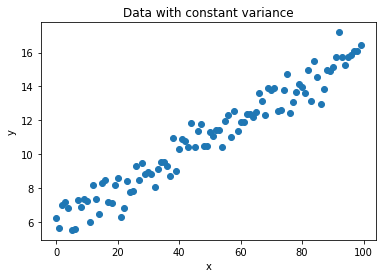

In [91]:
## Generating some data with constant variance /noise
# This is the assumption of linear regression
# 
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)

## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

# When we move from left to right along the x-axis, 
# we won’t see a lot of variation in the values of y. 
# An linear regression would be the ideal candidate 
# here to model the data.

In [92]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))

Mean squared error: 0.50
Variance score: 0.95


Text(0.5, 1.0, 'Linear regression')

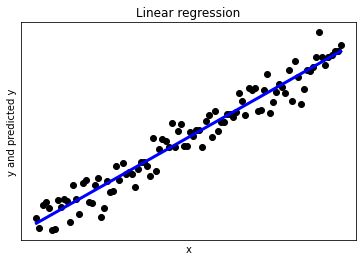

In [93]:
## Plotting the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

# This will lead to us having modeled our data well on our dataset.
# Our variance score of 0.88 is close to 1 which usually is when
# we model our data perfectly. 
# NB: our variance score will vary based on the randomly generated values above

Text(0.5, 1.0, 'Data with non-constant variance')

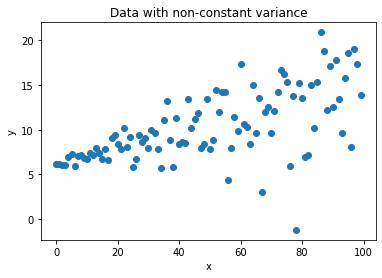

In [94]:
## Now let get to work with some data that violates 
# our linear regression assumption. This means first 
# adding some noise to our dataset. 
# We will first generating some data with non-constant variance
# 
x_ = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## Non constant variance
var_ = 0.1 + 0.05 * x_

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_)

## Linear egression equation
y_ = intercept_ + slope_ * x + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

# From our graph, we will get to see that a phenomenon
# where the variability of y is unequal across the range 
# of values of x is called as Heteroscedasticity. 
# As it will be seen in the plot it takes the shape of a cone. 
# The y variable widens as the value of x increases.

In [95]:
## Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

# With a low variance score of 0.51, it means that our linear regression 
# did not do a good job. 

Mean squared error: 9.74
Variance score: 0.34


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

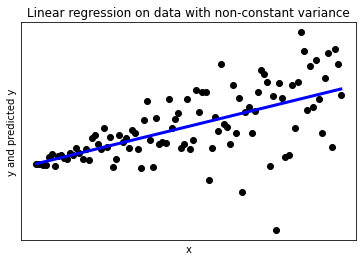

In [96]:
## We can also see this by plotting the regression below
#
plt.figure(4)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression on data with non-constant variance")

# We will get to observe that our line of best fit is far from perfect

In [97]:
# We take the data into a pandas dataframe so that 
# its easier for us to work with statsmodel interfaces. 
# Our dataframe data has two columns, ‘x’ and ‘y’
#

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [98]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', house)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3258
Model:                       QuantReg   Bandwidth:                   2.329e+04
Method:                 Least Squares   Sparsity:                    3.137e+05
Date:                Fri, 26 Nov 2021   No. Observations:                16612
Time:                        09:42:29   Df Residuals:                    16600
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.957e+06   1.11e+05     44.496      0.000    4.74e+06    5.18e+06
X[0]       -1.648e+04   2036.554     -8.092      0.000   -2.05e+04   -1.25e+04
X[1]        1.705e+04   3167.011      5.384      0.000    1.08e+04    2.33e+04
X[2]          68.6175      4.133     16.602      0.0

In [99]:
# This is our prediction for price based on our model
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = b = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 130635.41436271543
The R2 score for the elastic model is: 0.5250246431718388


*Ridge Regression*

In [71]:
# Splitting our data into training and test sets

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [107]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of17007898709.747581will be our indicator to determine if the regularized ridge regression model is superior or not.

17007898709.747581


In [108]:
# Splitting the dataset into training and testing sets
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [109]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [110]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

In [111]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 130700.91945696303
The R2 score for the ridge model is: 0.5236590595883834


In [120]:
# The 0.35 is lower than the 0.38. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 71.25251782319901,
 'bedrooms': 18973.23793917778,
 'condition': 101183.27326232685,
 'floors': 21845.01058855401,
 'grade': 36.17361842333912,
 'price': -16921.075888962092,
 'sqft_above': -2760.8423138273997,
 'sqft_basement': 69.613805531666,
 'sqft_living': -3.871189633344329,
 'sqft_lot': 28303.406323151285,
 'yr_built': -5.576799853997727}

*Lasso Regression*

In [121]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
#


In [78]:
# Splitting our data into training and test sets

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [79]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Since we have 4 features, we can use 4 degrees of freedom to avoid over or underfitting the model,
# since it has the lowest RMSE.

In [80]:
# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)
d = r2_score(y_test,y_pred)
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",d)

The RMSE for the lasso model: 130705.91921936344
The R2 score for the lasso model is: 0.5236226155130763


In [122]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5382856580733136
linear score: 0.538285692634152
lasso MSE: 16952270709.912123
linear MSE: 16952269440.978855
lasso best estimator coef: [-12847.52545451  13166.37596314  44257.72208182 -14788.22649638
  16194.44332482  14366.72609863  81520.18024331  13548.89452648
 -80779.45164037  34449.55886209 -15040.08241938]
linear coef: [-12847.78560102  13166.52197035  44257.7801817  -14788.26283898
  16194.60536178  14366.81925105  81520.21783285  13548.98690139
 -80779.70495137  34449.6848936  -15040.09724084]


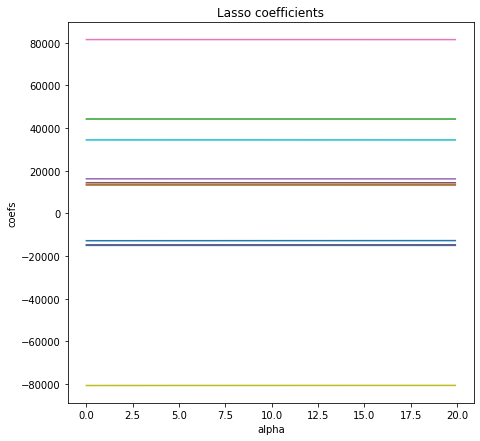

In [125]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

*Elastic Net Regression*

In [82]:
# Splitting our data into training and test sets

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# The means of the RMSEs are within the range of those we found in the Polynomial Regression Model we built.

In [85]:
# Normalizing the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [86]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [87]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", e)

The RMSE for the Elastic model: 130658.71113640377
The R2 score for the elastic model is: 0.5239666672894863


In [88]:
# Reviewing the Solution 
# Models vs r2 score.
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)
print("**************")
print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear   0.523625
1         quantile   0.525025
2            ridge   0.523659
3            lasso   0.523623
4          elastic   0.523967
**************
The mean r2 scores is: r2_scores    0.52398
dtype: float64


**Conclusion**

After a thorough and exhaustive analysis using the 5 regression models above, we see that the difference between the different regression models accuracy scores using r2 scores metric is quite small and there is no clear cut difference to distinguish one from the other in terms of perfomance.

**8. Challenging the solution**

Our average r2_scores = 0.523989. This translates to 52.399% accuracy which is not the best that we can have to come up with a solid marketing and pricing for our client.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?